In [1]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the random module.
import random
# Import the NumPy module.
import numpy as np
# Import the API key.
from config import weather_api_key
import pandas as pd
# Import the time module.
import time
import matplotlib.pyplot as plt

In [2]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]


In [3]:
x = np.random.uniform(-90.000, 90.000, size=1200)
y = np.random.uniform(-90.000, 90.000, size=1200)
coordinates = zip(x, y)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

527

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tinde
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | malatya
Processing Record 5 of Set 1 | conceicao do araguaia
Processing Record 6 of Set 1 | salisbury
Processing Record 7 of Set 1 | tucuman
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | maniitsoq
Processing Record 11 of Set 1 | moose factory
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | walvis bay
Processing Record 14 of Set 1 | talara
Processing Record 15 of Set 1 | general roca
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 |

Processing Record 38 of Set 4 | belmonte
Processing Record 39 of Set 4 | frumusica
Processing Record 40 of Set 4 | parrsboro
Processing Record 41 of Set 4 | patur
Processing Record 42 of Set 4 | puerto leguizamo
Processing Record 43 of Set 4 | calvinia
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | novyy urengoy
Processing Record 47 of Set 4 | jablanica
Processing Record 48 of Set 4 | salamiyah
Processing Record 49 of Set 4 | pila
Processing Record 50 of Set 4 | bambous virieux
Processing Record 1 of Set 5 | sao filipe
Processing Record 2 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 3 of Set 5 | wernigerode
Processing Record 4 of Set 5 | gloucester
Processing Record 5 of Set 5 | dorado
Processing Record 6 of Set 5 | saint anthony
Processing Record 7 of Set 5 | aksarka
Processing Record 8 of Set 5 | pavino
Processing Record 9 of Set 5 | gambela
Processing Record 10 of Set 5 | grand river south east


Processing Record 27 of Set 8 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 28 of Set 8 | iralaya
Processing Record 29 of Set 8 | kavaratti
Processing Record 30 of Set 8 | lambarene
Processing Record 31 of Set 8 | analipsis
Processing Record 32 of Set 8 | dunkirk
Processing Record 33 of Set 8 | macon
Processing Record 34 of Set 8 | joshimath
Processing Record 35 of Set 8 | namwala
Processing Record 36 of Set 8 | chingirlau
Processing Record 37 of Set 8 | laguna
Processing Record 38 of Set 8 | lere
Processing Record 39 of Set 8 | porto novo
Processing Record 40 of Set 8 | kasongo-lunda
Processing Record 41 of Set 8 | sisimiut
Processing Record 42 of Set 8 | plouzane
Processing Record 43 of Set 8 | lidkoping
Processing Record 44 of Set 8 | narasannapeta
Processing Record 45 of Set 8 | usinsk
Processing Record 46 of Set 8 | yar-sale
Processing Record 47 of Set 8 | visby
Processing Record 48 of Set 8 | oktyabrskoye
Processing Record 49 of Set 8 | igunga
Processing Recor

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.26,70,20,19.57,AR,2021-12-02 03:53:07
1,Tinde,-3.8833,33.2000,69.76,71,67,7.47,TZ,2021-12-02 03:54:45
2,Port Elizabeth,-33.9180,25.5701,66.09,88,0,20.71,ZA,2021-12-02 03:54:46
3,Malatya,38.5000,38.0000,30.25,64,0,6.91,TR,2021-12-02 03:54:46
4,Conceicao Do Araguaia,-8.2578,-49.2647,72.46,95,100,1.30,BR,2021-12-02 03:54:46
5,Salisbury,51.0693,-1.7957,36.48,83,10,8.23,GB,2021-12-02 03:53:38
6,Tucuman,-26.8241,-65.2226,78.80,61,40,4.61,AR,2021-12-02 03:54:47
7,Hithadhoo,-0.6000,73.0833,82.15,74,90,6.08,MV,2021-12-02 03:54:47
8,Maniitsoq,65.4167,-52.9000,33.01,86,100,8.72,GL,2021-12-02 03:54:47
9,Moose Factory,51.2585,-80.6094,19.38,79,90,6.91,CA,2021-12-02 03:54:48


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'12/01/21'

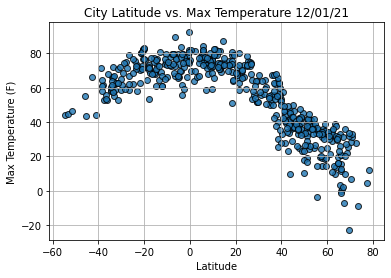

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

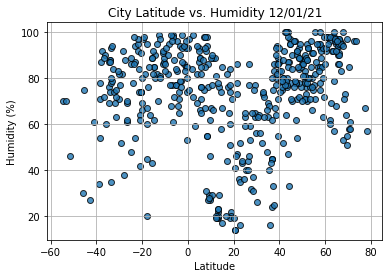

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

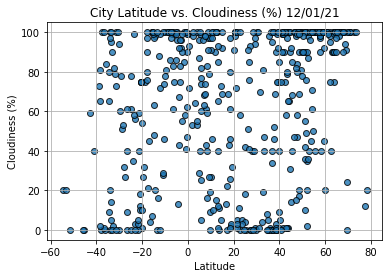

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

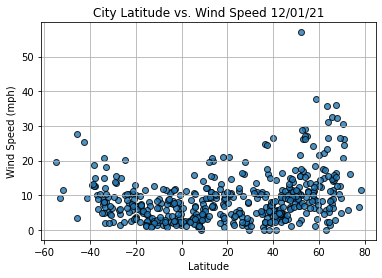

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [17]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [18]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [19]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

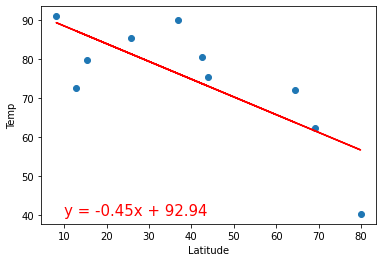

In [20]:
# Import Matplotlib.
#import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Lat                      -34.4187
Lng                       19.2345
Max Temp                     57.9
Humidity                       76
Cloudiness                     65
Wind Speed                   7.34
Country                        ZA
Date          2021-12-02 03:54:49
Name: 13, dtype: object

In [38]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
480     True
481    False
482     True
483     True
484     True
Name: Lat, Length: 485, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Malatya,38.5000,38.0000,30.25,64,0,6.91,TR,2021-12-02 03:54:46
5,Salisbury,51.0693,-1.7957,36.48,83,10,8.23,GB,2021-12-02 03:53:38
8,Maniitsoq,65.4167,-52.9000,33.01,86,100,8.72,GL,2021-12-02 03:54:47
9,Moose Factory,51.2585,-80.6094,19.38,79,90,6.91,CA,2021-12-02 03:54:48
15,Jamestown,42.0970,-79.2353,39.72,92,90,4.00,US,2021-12-02 03:54:50


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

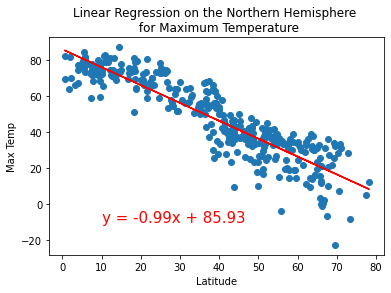

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
\n for Maximum Temperature', 'Max Temp',(10,-10))

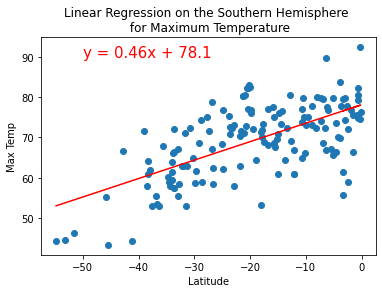

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
\n for Maximum Temperature', 'Max Temp',(-50,90))

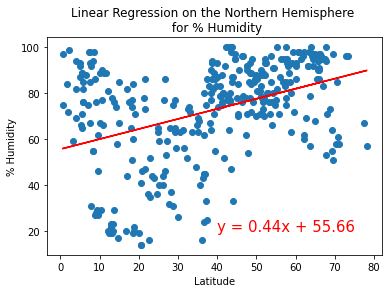

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
\n for % Humidity', '% Humidity',(40,20))

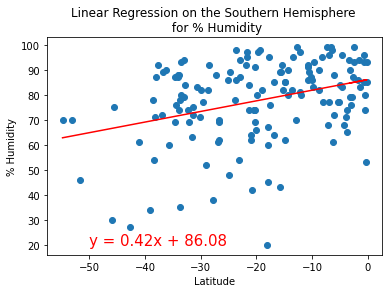

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
\n for % Humidity', '% Humidity',(-50,20))

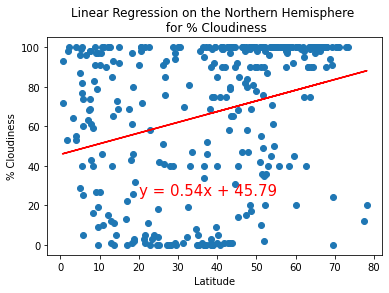

In [111]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
\n for % Cloudiness', '% Cloudiness',(20,25))

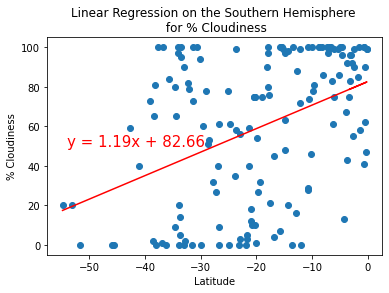

In [126]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
\n for % Cloudiness', '% Cloudiness',(-54,50))

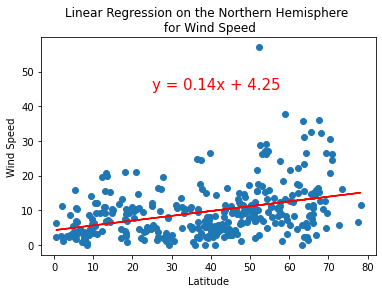

In [129]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
\n for Wind Speed', 'Wind Speed',(25,45))

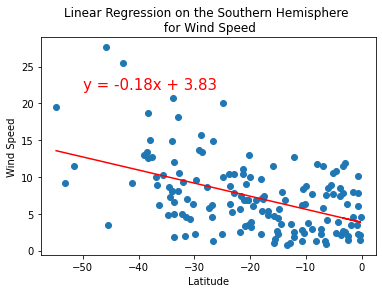

In [132]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
\n for Wind Speed', 'Wind Speed',(-50,22))